In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
! kaggle datasets download -d rupakroy/online-payments-fraud-detection-dataset

Dataset URL: https://www.kaggle.com/datasets/rupakroy/online-payments-fraud-detection-dataset
License(s): CC-BY-NC-SA-4.0
 97% 172M/178M [00:03<00:00, 55.3MB/s]
100% 178M/178M [00:03<00:00, 59.7MB/s]


In [4]:
! unzip online-payments-fraud-detection-dataset.zip

Archive:  online-payments-fraud-detection-dataset.zip
  inflating: PS_20174392719_1491204439457_log.csv  


In [5]:
df=pd.read_csv("PS_20174392719_1491204439457_log.csv")
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [6]:
df.shape

(6362620, 11)

In [ ]:
df.iloc[9:12,3:6]

,nameOrig,oldbalanceOrg,newbalanceOrig
9,C712410124,41720.0,36382.23
10,C1900366749,4465.0,0.00
11,C249177573,20771.0,17671.03


In [ ]:
df.dtypes

step                int64
type               object
amount            float64
nameOrig           object
oldbalanceOrg     float64
newbalanceOrig    float64
nameDest           object
oldbalanceDest    float64
newbalanceDest    float64
isFraud             int64
isFlaggedFraud      int64
dtype: object

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [7]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [8]:
df["isFlaggedFraud"].unique()

array([0, 1])

In [9]:
def norm(df,column):
  df_col=df[column]
  max_val=df_col.max()
  min_val=df_col.min()
  df[column]=(df[column]-min_val)/(max_val-min_val)


In [10]:
norm_col=["step","amount","oldbalanceOrg","newbalanceOrig","oldbalanceDest","newbalanceDest"]
for col in norm_col:
  norm(df,col)

In [ ]:
df


,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,0.0,PAYMENT,0.000106,C1231006815,0.002855,0.003233,M1979787155,0.000000,0.000000,0,0
1,0.0,PAYMENT,0.000020,C1666544295,0.000357,0.000391,M2044282225,0.000000,0.000000,0,0
2,0.0,TRANSFER,0.000002,C1305486145,0.000003,0.000000,C553264065,0.000000,0.000000,1,0
3,0.0,CASH_OUT,0.000002,C840083671,0.000003,0.000000,C38997010,0.000059,0.000000,1,0
4,0.0,PAYMENT,0.000126,C2048537720,0.000697,0.000603,M1230701703,0.000000,0.000000,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,1.0,CASH_OUT,0.003674,C786484425,0.005701,0.000000,C776919290,0.000000,0.000954,1,0
6362616,1.0,TRANSFER,0.068272,C1529008245,0.105923,0.000000,C1881841831,0.000000,0.000000,1,0
6362617,1.0,CASH_OUT,0.068272,C1162922333,0.105923,0.000000,C1365125890,0.000192,0.017912,1,0
6362618,1.0,TRANSFER,0.009195,C1685995037,0.014265,0.000000,C2080388513,0.000000,0.000000,1,0


In [11]:
df["isFraud"].sum()

8213

In [12]:
df_isNOtFraud=df[df["isFraud"]==0]
df_isFraud=df[df["isFraud"]==1]

In [13]:
df_isNOtFraud=df_isNOtFraud.sample(n=8216)

In [14]:
type_dummies=pd.get_dummies(df["type"])

In [ ]:
type_dummies

,CASH_IN,CASH_OUT,DEBIT,PAYMENT,TRANSFER
0,False,False,False,True,False
1,False,False,False,True,False
2,False,False,False,False,True
3,False,True,False,False,False
4,False,False,False,True,False
...,...,...,...,...,...
6362615,False,True,False,False,False
6362616,False,False,False,False,True
6362617,False,True,False,False,False
6362618,False,False,False,False,True


In [15]:
df=pd.concat([df,type_dummies],axis=1)

In [ ]:
df


,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,CASH_IN,CASH_OUT,DEBIT,PAYMENT,TRANSFER
0,0.0,PAYMENT,0.000106,C1231006815,0.002855,0.003233,M1979787155,0.000000,0.000000,0,0,False,False,False,True,False
1,0.0,PAYMENT,0.000020,C1666544295,0.000357,0.000391,M2044282225,0.000000,0.000000,0,0,False,False,False,True,False
2,0.0,TRANSFER,0.000002,C1305486145,0.000003,0.000000,C553264065,0.000000,0.000000,1,0,False,False,False,False,True
3,0.0,CASH_OUT,0.000002,C840083671,0.000003,0.000000,C38997010,0.000059,0.000000,1,0,False,True,False,False,False
4,0.0,PAYMENT,0.000126,C2048537720,0.000697,0.000603,M1230701703,0.000000,0.000000,0,0,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6362615,1.0,CASH_OUT,0.003674,C786484425,0.005701,0.000000,C776919290,0.000000,0.000954,1,0,False,True,False,False,False
6362616,1.0,TRANSFER,0.068272,C1529008245,0.105923,0.000000,C1881841831,0.000000,0.000000,1,0,False,False,False,False,True
6362617,1.0,CASH_OUT,0.068272,C1162922333,0.105923,0.000000,C1365125890,0.000192,0.017912,1,0,False,True,False,False,False
6362618,1.0,TRANSFER,0.009195,C1685995037,0.014265,0.000000,C2080388513,0.000000,0.000000,1,0,False,False,False,False,True


In [16]:
df.drop(columns=["type","nameOrig","nameDest"],inplace=True)

In [17]:
df


,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,CASH_IN,CASH_OUT,DEBIT,PAYMENT,TRANSFER
0,0.0,0.000106,0.002855,0.003233,0.000000,0.000000,0,0,False,False,False,True,False
1,0.0,0.000020,0.000357,0.000391,0.000000,0.000000,0,0,False,False,False,True,False
2,0.0,0.000002,0.000003,0.000000,0.000000,0.000000,1,0,False,False,False,False,True
3,0.0,0.000002,0.000003,0.000000,0.000059,0.000000,1,0,False,True,False,False,False
4,0.0,0.000126,0.000697,0.000603,0.000000,0.000000,0,0,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6362615,1.0,0.003674,0.005701,0.000000,0.000000,0.000954,1,0,False,True,False,False,False
6362616,1.0,0.068272,0.105923,0.000000,0.000000,0.000000,1,0,False,False,False,False,True
6362617,1.0,0.068272,0.105923,0.000000,0.000192,0.017912,1,0,False,True,False,False,False
6362618,1.0,0.009195,0.014265,0.000000,0.000000,0.000000,1,0,False,False,False,False,True


In [18]:
# Data Processing
import pandas as pd
import numpy as np

# Modelling
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint

# Tree Visualisation
from sklearn.tree import export_graphviz
from IPython.display import Image
import graphviz

In [19]:
X=df.drop(columns=["isFraud"])
y=df["isFraud"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

In [21]:
y_pred = rf.predict(X_test)

In [22]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9997163118338043


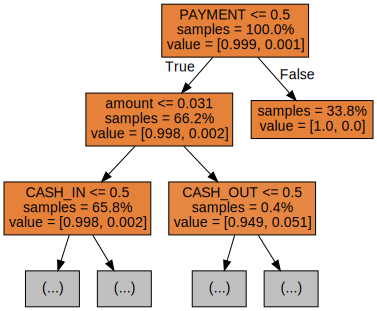

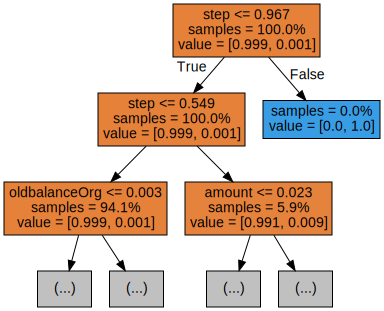

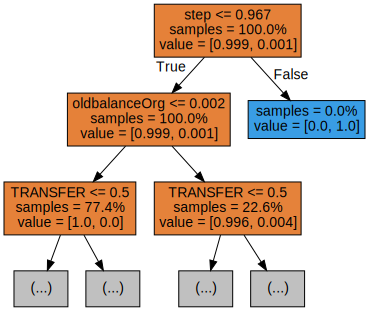

In [22]:
for i in range(3):
    tree = rf.estimators_[i]
    dot_data = export_graphviz(tree,
                               feature_names=X_train.columns,
                               filled=True,
                               max_depth=2,
                               impurity=False,
                               proportion=True)
    graph = graphviz.Source(dot_data)
    display(graph)

In [ ]:
param_dist = {'n_estimators': randint(50,500),
              'max_depth': randint(1,20)}

# Create a random forest classifier
rf = RandomForestClassifier()

# Use random search to find the best hyperparameters
rand_search = RandomizedSearchCV(rf,
                                 param_distributions = param_dist,
                                 n_iter=5,
                                 cv=5)

# Fit the random search object to the data
rand_search.fit(X_train, y_train)

In [ ]:
# Create a variable for the best model
best_rf = rand_search.best_estimator_

# Print the best hyperparameters
print('Best hyperparameters:',  rand_search.best_params_)

In [ ]:
# Generate predictions with the best model
y_pred = best_rf.predict(X_test)

# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred)

ConfusionMatrixDisplay(confusion_matrix=cm).plot();

In [ ]:

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

In [ ]:
# Create a series containing feature importances from the model and feature names from the training data
feature_importances = pd.Series(best_rf.feature_importances_, index=X_train.columns).sort_values(ascending=False)

# Plot a simple bar chart
feature_importances.plot.bar();